## Observations and Insights

1) Given that the total treatments were administered to almost equal numbers of male and female rats, we could infer that gender impacts treatment responsiveness based on any findings of significant effects on one gender and not the other; however, the distribution of genders would need to be almost equal for each drug regimen to better support such an inference.

2)

3)

## Dependencies and starter code

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_set = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [2]:
merge_set.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Summary statistics for tumor volumes measured in each drug regimen
regimen_df = merge_set.groupby('Drug Regimen')
tumor_summary = regimen_df['Tumor Volume (mm3)'].describe()
tumor_summary

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [4]:
# Declare list variable to pull each of the drugs' names
drug_list = []

# Append drug names from array object of the column "Drug Regimen" into drug name list object
unique_drugs = merge_set['Drug Regimen'].unique()
for drug in unique_drugs:
    drug_list.append(drug)


drug_list

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

In [5]:
# pd.melt(drug_list)
# drug_list.reshape((1,10))
# drug_list is a tuple, need to convert to list

In [31]:
median_list = []
variance_list = []

In [33]:
for drug in drug_list:
    median_list.append(np.median(merge_set.loc[merge_set['Drug Regimen']==drug]['Tumor Volume (mm3)']))
    
#median_list = median_list[10:20]
median_list

[40.67323554,
 41.557808879999996,
 51.82058438,
 52.28893409,
 51.77615728000001,
 52.43173664,
 51.818479325,
 53.698742644999996,
 50.8546323,
 52.509284609999995]

In [8]:
# Create separate dfs to calcute additional summary data for each drug regimen
ramicane_df = merge_set.loc[merge_set['Drug Regimen'] == "Ramicane"]
capomulin_df = merge_set.loc[merge_set['Drug Regimen'] == "Capomulin"]
infubinol_df = merge_set.loc[merge_set['Drug Regimen'] == "Infubinol"]
placebo_df = merge_set.loc[merge_set['Drug Regimen'] == "Placebo"]
ceftamin_df = merge_set.loc[merge_set['Drug Regimen'] == "Ceftamin"]
stelasyn_df = merge_set.loc[merge_set['Drug Regimen'] == "Stelasyn"]
zoniferol_df = merge_set.loc[merge_set['Drug Regimen'] == "Zoniferol"]
ketapril_df = merge_set.loc[merge_set['Drug Regimen'] == "Ketapril"]
propriva_df = merge_set.loc[merge_set['Drug Regimen'] == "Propriva"]
naftisol_df = merge_set.loc[merge_set['Drug Regimen'] == "Naftisol"]

In [9]:
variance_list.append(ramicane_df['Tumor Volume (mm3)'].var())
variance_list.append(capomulin_df['Tumor Volume (mm3)'].var())
variance_list.append(infubinol_df['Tumor Volume (mm3)'].var())
variance_list.append(placebo_df['Tumor Volume (mm3)'].var())
variance_list.append(ceftamin_df['Tumor Volume (mm3)'].var())
variance_list.append(stelasyn_df['Tumor Volume (mm3)'].var())
variance_list.append(zoniferol_df['Tumor Volume (mm3)'].var())
variance_list.append(ketapril_df['Tumor Volume (mm3)'].var())
variance_list.append(propriva_df['Tumor Volume (mm3)'].var())
variance_list.append(naftisol_df['Tumor Volume (mm3)'].var())

In [10]:
sem_list = []
# st.sem(ramicane_df)
sem_list.append(st.sem(ramicane_df['Tumor Volume (mm3)']))
sem_list.append(st.sem(capomulin_df['Tumor Volume (mm3)']))
sem_list.append(st.sem(infubinol_df['Tumor Volume (mm3)']))
sem_list.append(st.sem(placebo_df['Tumor Volume (mm3)']))
sem_list.append(st.sem(ceftamin_df['Tumor Volume (mm3)']))
sem_list.append(st.sem(stelasyn_df['Tumor Volume (mm3)']))
sem_list.append(st.sem(zoniferol_df['Tumor Volume (mm3)']))
sem_list.append(st.sem(ketapril_df['Tumor Volume (mm3)']))
sem_list.append(st.sem(propriva_df['Tumor Volume (mm3)']))
sem_list.append(st.sem(naftisol_df['Tumor Volume (mm3)']))

In [20]:
variance_df = pd.DataFrame(variance_list, drug_list)
#variance_df.sort_index()
variance_df

,0
Ramicane,23.486704
Capomulin,24.947764
Infubinol,43.128684
Placebo,61.168083
Ceftamin,39.290177
Stelasyn,59.450562
Zoniferol,48.533355
Ketapril,68.553577
Propriva,42.351070
Naftisol,66.173479


In [22]:
variance_df = variance_df.sort_index()

variance_df

,0
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.351070
Ramicane,23.486704
Stelasyn,59.450562
Zoniferol,48.533355


In [24]:
sem_df = pd.DataFrame(sem_list, drug_list)
sem_df = sem_df.sort_index()
sem_df

,0
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111
Zoniferol,0.516398


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_summary_final = tumor_summary[['mean', 'std']]
tumor_summary_final

,mean,std
Drug Regimen,,
Capomulin,40.675741,4.994774
Ceftamin,52.591172,6.268188
Infubinol,52.884795,6.567243
Ketapril,55.235638,8.279709
Naftisol,54.331565,8.134708
Placebo,54.033581,7.821003
Propriva,52.322552,6.507770
Ramicane,40.216745,4.846308
Stelasyn,54.233149,7.710419


In [38]:
tumor_summary_final['Variance'] = variance_df
tumor_summary_final['SEM'] = sem_df
tumor_summary_final['Median'] = median_list

tumor_summary_final

C:\Users\sebri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sebri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sebri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,mean,std,Variance,SEM,Median
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,24.947764,0.329346,40.673236
Ceftamin,52.591172,6.268188,39.290177,0.469821,41.557809
Infubinol,52.884795,6.567243,43.128684,0.492236,51.820584
Ketapril,55.235638,8.279709,68.553577,0.603860,52.288934
Naftisol,54.331565,8.134708,66.173479,0.596466,51.776157
Placebo,54.033581,7.821003,61.168083,0.581331,52.431737
Propriva,52.322552,6.507770,42.351070,0.512884,51.818479
Ramicane,40.216745,4.846308,23.486704,0.320955,53.698743
Stelasyn,54.233149,7.710419,59.450562,0.573111,50.854632


In [41]:
tumor_summary_final.rename(columns={"mean": "Mean", 
                                    "std": "STD"})

,Mean,STD,Variance,SEM,Median
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,24.947764,0.329346,40.673236
Ceftamin,52.591172,6.268188,39.290177,0.469821,41.557809
Infubinol,52.884795,6.567243,43.128684,0.492236,51.820584
Ketapril,55.235638,8.279709,68.553577,0.603860,52.288934
Naftisol,54.331565,8.134708,66.173479,0.596466,51.776157
Placebo,54.033581,7.821003,61.168083,0.581331,52.431737
Propriva,52.322552,6.507770,42.351070,0.512884,51.818479
Ramicane,40.216745,4.846308,23.486704,0.320955,53.698743
Stelasyn,54.233149,7.710419,59.450562,0.573111,50.854632


## Bar plots

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_summary['count'].plot(kind='bar', title='Treatments')

plt.ylabel('# of Treatments Administered')
plt.tight_layout()
plt.savefig('Drugs_Administered_Pandas_BarPlot')
plt.show()

In [48]:
count = pd.DataFrame(tumor_summary.count())

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(drug_list, count, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Treatments Administered")
##plt.legend(loc='best')


plt.tight_layout()
plt.savefig('Drugs_Administered_PyPlot_BarPlot')
plt.show()

## Pie plots

In [63]:
# Group by gender
gender_df = merge_set.groupby('Sex')
gender_df = gender_df['Sex'].count()
gender_df

Sex
Female    935
Male      958
Name: Sex, dtype: int64

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df.plot(kind='pie', title='Distribution of Rats by Sex', startangle=90)
plt.axis('Equal')
plt.savefig('Genders_of_Treated_Rats_Pandas_PiePlot')
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df, startangle=90)
plt.title("Distribution of Rats by Sex")
plt.axis('Equal')
plt.savefig('Genders_of_Treated_Rats_PyPlot_PiePlot')
plt.show()

## Quartiles, outliers and boxplots

In [118]:
# Create df for the best drug regimens

best_df = merge_set.loc[(merge_set['Drug Regimen'] == 'Capomulin') | (merge_set['Drug Regimen'] == 'Ramicane') | (merge_set['Drug Regimen'] == 'Infubinol') | (merge_set['Drug Regimen'] == 'Ceftamin'), :]

# Sort best drug regimens by Timepoint to narrow down to latest timepoints for each mouse
best_df = best_df.sort_values("Timepoint", ascending = False)

In [119]:
# Identify each of the mice in the four best drug regimens
## DELETE CELL FOR HW SUBMISSION
unique_mice = []
mice = best_df['Mouse ID'].unique()
for mouse in mice:
    unique_mice.append(mouse)
len(unique_mice)

100

In [120]:
# Verify that each of the mice has the same number of timepoints
## DELETE CELL FOR HW SUBMISSION

timepoint_df = best_df.loc[best_df['Timepoint']== 45, :]
timepoint_count = timepoint_df.count()

## There are varying final timepoints. Must find final timepoints for each of the mice.

In [125]:
# Filter rows to the last timepoints of each mouse
last_timepoint_df = best_df.drop_duplicates(subset='Mouse ID', keep='first', inplace=False)
last_timepoint_df.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1205,m756,Infubinol,Male,19,30,5,47.010364,1
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0


In [150]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = last_timepoint_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The interquartile range of tumor volumes is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# If there are no outliers, print statement.
if (last_timepoint_df.loc[last_timepoint_df['Tumor Volume (mm3)'] < lower_bound])['Tumor Volume (mm3)'].count()== 0 and (last_timepoint_df.loc[last_timepoint_df['Tumor Volume (mm3)'] > upper_bound])['Tumor Volume (mm3)'].count()== 0:
    print("There are no outlier tumor volume values in the dataset.")

The interquartile range of tumor volumes is: 22.74251795250001
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.
There are no outlier tumor volume values in the dataset.


<IPython.core.display.Javascript object>


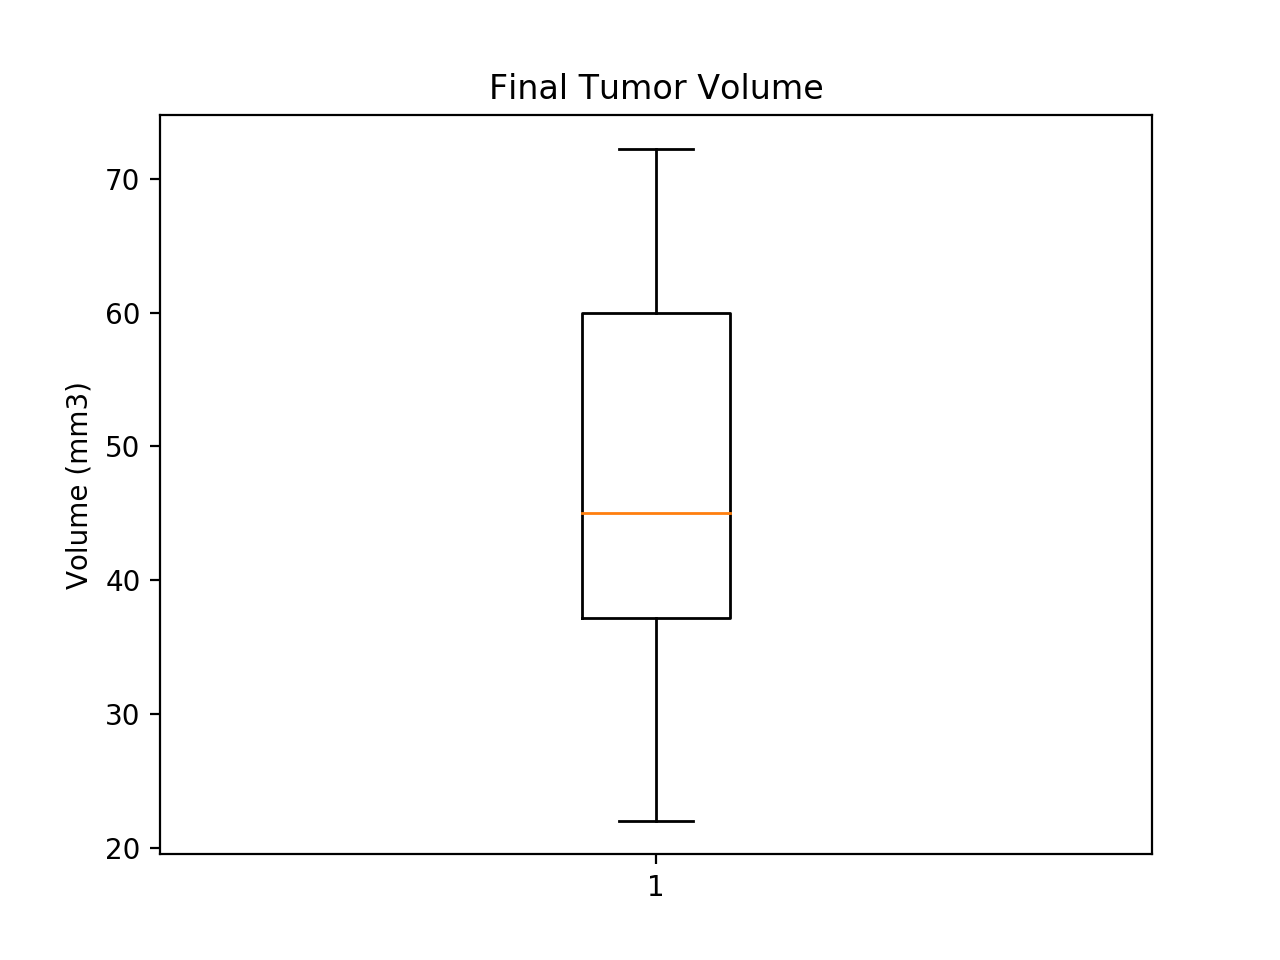

In [136]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
## FIG NUMBER FOR HW SUBMISSION; OTHERWISE, THINK THE CHARTS WILL INTERFERE WITH EACH OTHER
outlier = dict(markerfacecolor='r', marker='X')
fig1, ax3 = plt.subplots()
ax3.set_title("Final Tumor Volume")
ax3.set_ylabel('Volume (mm3)')
ax3.boxplot(last_timepoint_df['Tumor Volume (mm3)'], flierprops=outlier)
plt.savefig('FinalTumorVolume_BoxPlot')

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
